In [28]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.utils import shuffle
import scipy as sp
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import pyplot as plt

#### datasets 

In [4]:
X_train = pd.read_csv('C:\Pro\Cours\A5 - IPP\Hickathon\hackathon-team-5\my_X_train.csv')
y_train = pd.read_csv('C:\Pro\Cours\A5 - IPP\Hickathon\hackathon-team-5\my_y_train.csv')
X_test = pd.read_csv('C:\Pro\Cours\A5 - IPP\Hickathon\hackathon-team-5\my_X_test.csv')

### Model 1 : LGBM regressor

In [7]:
X_train.shape

(1762970, 39)

In [8]:
y_train.shape

(1762970, 2)

In [9]:
y_train.head(2)

,Unnamed: 0,Month 4
486200,486200,0
355078,355078,0


In [ ]:
X_train.pop('Unnamed: 0')
X_test.pop('Unnamed: 0')
y_train.pop('Unnamed: 0')

In [22]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Define the LightGBM model
lgb_model = lgb.LGBMRegressor(verbose=-1, random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [90, 100, 110],
    'boosting_type': ['gbdt', 'dart', 'rf'],
    'max_depth': [10, 20, 30],
    'num_leaves': [16, 18, 20], # Adjust the range as needed
    'learning_rate': np.logspace(-1, 1, 4),
    'colsample_bytree': np.linspace(0.2, 0.8, 3),
    'reg_alpha': np.logspace(-4, -2, 3),
    'reg_lambda': np.logspace(-4, -1, 3)
}

# Set up RandomizedSearchCV
lgbm_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations as needed
    scoring='neg_root_mean_squared_error',  # Use an appropriate scoring metric for your problem
    cv=3,  # Number of cross-validation folds
    random_state=42,
)

# Fit the model to the data
lgbm_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=42, verbose=-1),
                   param_distributions={'boosting_type': ['gbdt', 'dart', 'rf'],
                                        'colsample_bytree': array([0.2, 0.5, 0.8]),
                                        'learning_rate': array([ 0.1       ,  0.46415888,  2.15443469, 10.        ]),
                                        'max_depth': [10, 20, 30],
                                        'n_estimators': [90, 100, 110],
                                        'num_leaves': [16, 18, 20],
                                        'reg_alpha': array([0.0001, 0.001 , 0.01  ]),
                                        'reg_lambda': array([0.0001    , 0.00316228, 0.1       ])},
                   random_state=42, scoring='neg_root_mean_squared_error')

<Axes: >

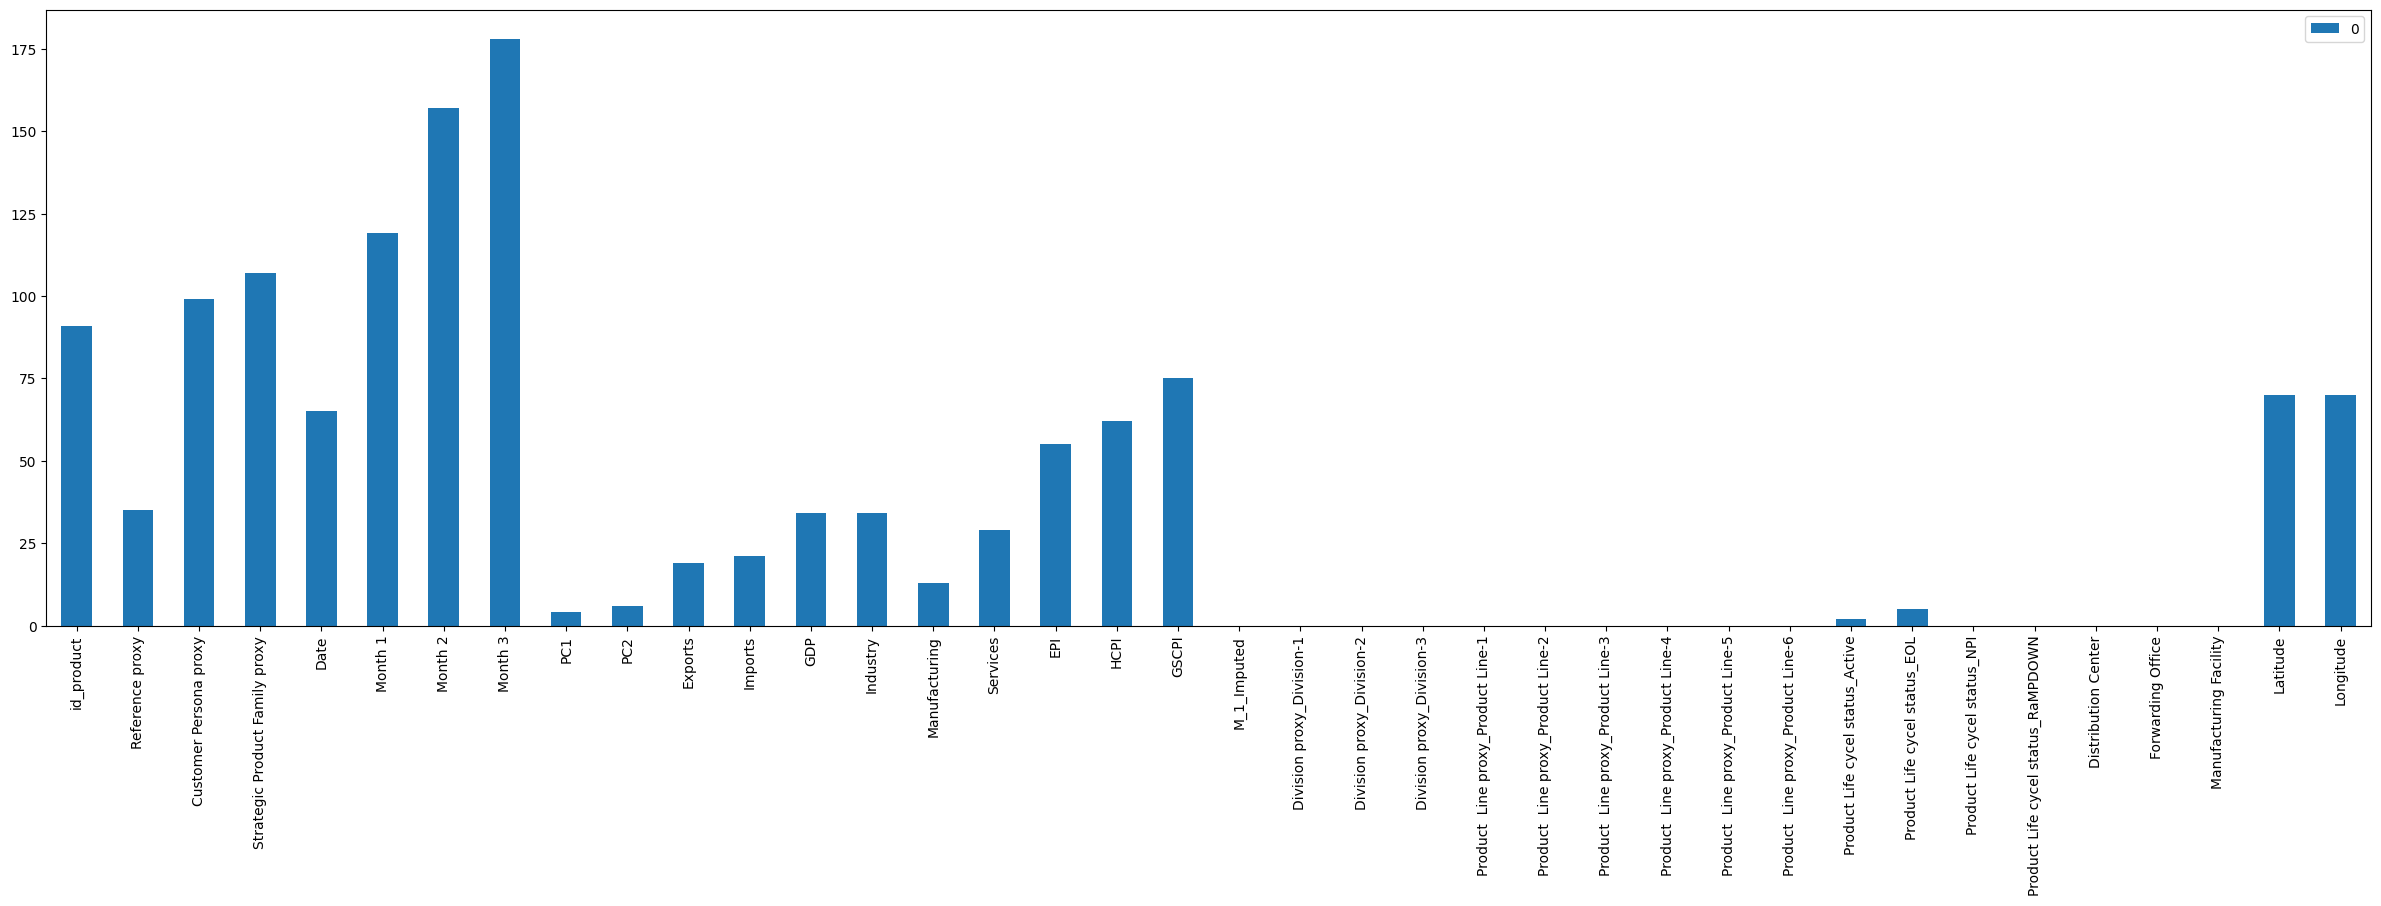

In [23]:
pd.DataFrame(lgbm_search.best_estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(30, 8))

In [26]:
lgbm_search.best_params_

{'reg_lambda': 0.0031622776601683794,
 'reg_alpha': 0.01,
 'num_leaves': 16,
 'n_estimators': 90,
 'max_depth': 20,
 'learning_rate': 0.46415888336127786,
 'colsample_bytree': 0.8,
 'boosting_type': 'dart'}

In [25]:
print(lgbm_search.best_params_)
results = pd.DataFrame(lgbm_search.cv_results_)
results.sort_values('rank_test_score')

{'reg_lambda': 0.0031622776601683794, 'reg_alpha': 0.01, 'num_leaves': 16, 'n_estimators': 90, 'max_depth': 20, 'learning_rate': 0.46415888336127786, 'colsample_bytree': 0.8, 'boosting_type': 'dart'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_reg_alpha,param_num_leaves,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,param_boosting_type,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,7.873806,0.546311,0.597034,0.015405,0.003162,0.01,16,90,20,0.464159,0.8,dart,"{'reg_lambda': 0.0031622776601683794, 'reg_alp...",-5.662192e+02,-4.505497e+02,-4.919607e+02,-5.029099e+02,4.785236e+01,1
9,4.351544,0.051938,0.724032,0.031948,0.0001,0.01,16,110,10,2.154435,0.8,rf,"{'reg_lambda': 0.0001, 'reg_alpha': 0.01, 'num...",-6.250461e+02,-4.235964e+02,-4.968808e+02,-5.151744e+02,8.325254e+01,2
0,8.569935,0.521906,1.010437,0.195688,0.003162,0.01,16,110,30,0.464159,0.5,rf,"{'reg_lambda': 0.0031622776601683794, 'reg_alp...",-6.342987e+02,-4.195761e+02,-4.925171e+02,-5.154640e+02,8.914920e+01,3
6,8.179031,0.889631,0.954948,0.270560,0.003162,0.01,16,110,30,0.464159,0.2,gbdt,"{'reg_lambda': 0.0031622776601683794, 'reg_alp...",-5.744727e+02,-4.788588e+02,-5.202773e+02,-5.245362e+02,3.915020e+01,4
5,8.161406,0.551379,1.376095,0.200032,0.003162,0.0001,16,100,30,0.464159,0.2,rf,"{'reg_lambda': 0.0031622776601683794, 'reg_alp...",-7.000761e+02,-4.656583e+02,-5.433779e+02,-5.697041e+02,9.749438e+01,5
7,12.736181,0.195883,0.734872,0.021568,0.003162,0.01,20,100,10,2.154435,0.5,dart,"{'reg_lambda': 0.0031622776601683794, 'reg_alp...",-1.419773e+03,-1.684127e+03,-1.505654e+03,-1.536518e+03,1.101065e+02,6
8,13.018221,0.204514,0.741997,0.003504,0.003162,0.01,18,110,30,2.154435,0.8,dart,"{'reg_lambda': 0.0031622776601683794, 'reg_alp...",-1.420945e+03,-1.778883e+03,-1.685954e+03,-1.628594e+03,1.516523e+02,7
2,13.863315,1.656889,1.115541,0.271742,0.1,0.01,18,100,10,2.154435,0.8,dart,"{'reg_lambda': 0.1, 'reg_alpha': 0.01, 'num_le...",-1.624632e+03,-1.750037e+03,-1.709774e+03,-1.694815e+03,5.227773e+01,8
4,4.593107,0.034495,0.449614,0.004697,0.003162,0.0001,18,110,20,10.0,0.8,dart,"{'reg_lambda': 0.0031622776601683794, 'reg_alp...",-1.264610e+37,-8.689356e+37,-8.777370e+37,-6.243779e+37,3.520987e+37,9
1,8.316657,0.111519,1.435367,0.044763,0.1,0.001,20,100,20,10.0,0.2,gbdt,"{'reg_lambda': 0.1, 'reg_alpha': 0.001, 'num_l...",-5.057163e+38,-5.269790e+38,-4.957958e+38,-5.094970e+38,1.300815e+37,10


In [27]:
y_pred = lgbm_search.predict(X_test)

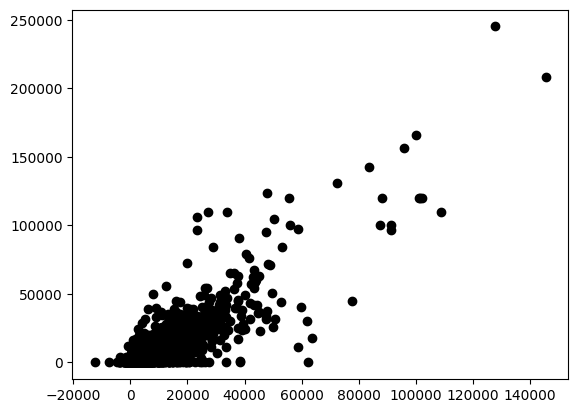

In [31]:
plt.plot(lgbm_search.predict(X_train), y_train, 'o', color='black')

plt.show()

In [33]:
submission = pd.read_csv("C:\Pro\Cours\A5 - IPP\Hickathon\hackathon-team-5\data\y_test_example.csv", sep = ";")
submission['Month 4'] = y_pred
submission['Month 4'] = submission['Month 4'].apply(lambda x: np.max([0, x]))
submission

,index,Month 4
0,490548,2882.826872
1,2167957,2.168930
2,1999013,2.168930
3,469221,329.500016
4,1171716,2.168930
...,...,...
440738,849490,2.168930
440739,1199858,2.168930
440740,1007643,2.168930
440741,1647728,2.168930


In [34]:
submission.to_csv("submission_9.csv", sep = ";", index = False)